# Curso de Classificação: Combinação de Classificadores

# Aula 1 - Testando modelos clássicos

## Vídeo 1.2 - Situação problema

In [ ]:
import pandas as pd

In [ ]:
treino = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/train.csv')
teste = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/test.csv')

In [ ]:
treino.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [ ]:
treino.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [ ]:
def prepara(df):
  df.drop(['Unnamed: 0',	'id'],axis=1,inplace=True)
  df.dropna(inplace=True)
  colunas_categoricas = ["Gender", "Customer Type", "Type of Travel", "Class"]
  df = pd.get_dummies(df, columns=colunas_categoricas)
  X = df.drop('satisfaction', axis=1)
  y = df['satisfaction']
  return X,y

In [ ]:
X_treino, y_treino = prepara(treino)
X_teste, y_teste = prepara(teste)

In [ ]:
treino.shape

(103594, 23)

In [ ]:
teste.shape

(25893, 23)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

In [ ]:
modelo1 = DecisionTreeClassifier(random_state=42)

validacao = cross_validate(modelo1, X_treino, y_treino, cv=5)

In [ ]:
validacao['test_score'].mean()

0.9443500672495754

In [ ]:
y_treino.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [ ]:
modelo1.fit(X_treino,y_treino)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = modelo1.predict(X_teste)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_teste,y_pred)

0.94612443517553

## Vídeo 1.3 - Pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
modelo2 = LogisticRegression(random_state=42)

In [ ]:
validacao = cross_validate(modelo2, X_treino, y_treino, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
validacao['test_score'].mean()

0.8194682834687818

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('model', modelo2)  # Modelo de Regressão Logística
])

In [ ]:
validacao = cross_validate(pipeline, X_treino, y_treino, cv=5)

In [ ]:
validacao['test_score'].mean()

0.8749541859894492

# Aula 2 - Votação

## Vídeo 2.1 - Votando no melhor resultado

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo3 = GaussianNB()

In [ ]:
nome_modelos = ['Árvores', 'Logística','Naive Bayes']

In [ ]:
pipelines = []

In [ ]:
for modelo, nome in zip([modelo1,modelo2,modelo3],nome_modelos):

  pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalização dos dados
    ('model', modelo)
  ])

  validacao = cross_validate(pipeline, X_treino, y_treino, cv=5)
  pipelines.append(pipeline)

  print(validacao['test_score'].mean())


0.9443983339909126
0.8749541859894492
0.8483406855152964


In [ ]:
votacao = VotingClassifier(estimators=[(nome_modelos[0], pipelines[0]),
                                       (nome_modelos[1], pipelines[1]),
                                       (nome_modelos[2], pipelines[2])],
                           voting='hard')

In [ ]:
votacao

VotingClassifier(estimators=[('Árvores',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('Logística',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LogisticRegression(random_state=42))])),
                             ('Naive Bayes',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model', GaussianNB())]))])

In [ ]:
validacao = cross_validate(votacao, X_treino, y_treino, cv=5)


validacao['test_score'].mean()

0.8917601803912731

In [ ]:
validacao['test_score']

array([0.88976302, 0.89135576, 0.88928037, 0.89251412, 0.89588763])

## Vídeo 2.2 - Votação SOFT

In [ ]:
votacao = VotingClassifier(estimators=[(nome_modelos[0], pipelines[0]),
                                       (nome_modelos[1], pipelines[1]),
                                       (nome_modelos[2], pipelines[2])],
                           voting='soft')

In [ ]:
validacao = cross_validate(votacao, X_treino, y_treino, cv=5)


validacao['test_score'].mean()

0.9007375478071673

In [ ]:
votacao.fit(X_treino,y_treino)

VotingClassifier(estimators=[('Árvores',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('Logística',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model',
                                               LogisticRegression(random_state=42))])),
                             ('Naive Bayes',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('model', GaussianNB())]))],
                 voting='soft')

In [ ]:
y_pred = votacao.predict(X_teste)

In [ ]:
accuracy_score(y_teste,y_pred)

0.897230911829452

## Vídeo 2.3 - Tunando a votação

In [ ]:
parametros = {
    'voting':['hard','soft'],
    'weights':[(1,1,1),(2,1,1),(1,2,1),(1,1,2)]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gridsearch = GridSearchCV(votacao,parametros)

In [ ]:
gridsearch.fit(X_treino,y_treino)

GridSearchCV(estimator=VotingClassifier(estimators=[('Árvores',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('model',
                                                                      DecisionTreeClassifier(random_state=42))])),
                                                    ('Logística',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('model',
                                                                      LogisticRegression(random_state=42))])),
                                                    ('Naive Bayes',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler()),
                                                                     ('model',
                                                                      GaussianNB())]))],
                                        voting='soft'),
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1),
                                     (1, 1, 2)]})

In [ ]:
gridsearch.best_params_

{'voting': 'soft', 'weights': (2, 1, 1)}

In [ ]:
gridsearch.best_score_

0.9443983339909126

In [ ]:
y_pred = gridsearch.predict(X_teste)

In [ ]:
accuracy_score(y_teste,y_pred)

0.9462402966052601

# Aula 3 - Bagging

## Vídeo 3.1 - BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_classifier = BaggingClassifier(n_estimators=10, random_state=42)

In [ ]:
bagging_classifier.fit(X_treino, y_treino)

BaggingClassifier(random_state=42)

In [ ]:
y_pred = bagging_classifier.predict(X_teste)

In [ ]:
accuracy_score(y_teste,y_pred)

0.9586760900629514

## Vídeo 3.2 - Validando o Bagging

In [ ]:
# Definir os modelos base
modelo_base = pipelines[0]

# Definir os parâmetros para o GridSearchCV
parametros_grid = {
    'n_estimators': [10, 20, 30],
    'max_samples': [0.5, 0.7, 0.9],
    'max_features': [0.5, 0.7, 0.9],

}

In [ ]:
# Criar o BaggingClassifier com o GridSearchCV
bagging_grid = GridSearchCV(
    BaggingClassifier(),
    parametros_grid,
    cv=5  # número de folds para a validação cruzada
)


# Treinar e ajustar o modelo
bagging_grid.fit(X_treino, y_treino)

# Obter a melhor combinação de parâmetros encontrada pelo GridSearchCV
melhores_parametros = bagging_grid.best_params_

# Criar o BaggingClassifier com os melhores parâmetros encontrados
bagging_classifier = BaggingClassifier(estimator=modelo_base, **melhores_parametros)

# Treinar o modelo final
bagging_classifier.fit(X_treino, y_treino)

# Fazer previsões
y_pred = bagging_classifier.predict(X_teste)

# Avaliar o desempenho do modelo
accuracy_score(y_teste, y_pred)

0.9624222762908894

## Vídeo 3.3 - ExtraTreesClassifier

In [ ]:
parametros_grid = {
    'n_estimators': [10, 20, 30],
    'max_features': [0.5, 0.7, 0.9],

}

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extratrees_grid = GridSearchCV(
    ExtraTreesClassifier(),
    parametros_grid,
    cv=5  # número de folds para a validação cruzada
)

In [ ]:
# Treinar e ajustar o modelo
extratrees_grid.fit(X_treino, y_treino)

# Obter a melhor combinação de parâmetros encontrada pelo GridSearchCV
melhores_parametros = extratrees_grid.best_params_

# Criar o ExtraTreesClassifier com os melhores parâmetros encontrados
extratrees_classifier = ExtraTreesClassifier(**melhores_parametros)

# Treinar o modelo final
extratrees_classifier.fit(X_treino, y_treino)

# Fazer previsões
y_pred_tree = extratrees_classifier.predict(X_teste)

# Avaliar o desempenho do modelo
accuracy_score(y_teste, y_pred_tree)

0.9636967520179199

In [ ]:
extratrees_grid.best_score_

0.9625847141437724

# Aula 4 - Boosting

## Vídeo 4.1 - AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
modelo = AdaBoostClassifier(n_estimators=50, learning_rate=1)

In [ ]:
modelo.fit(X_treino,y_treino)

AdaBoostClassifier(learning_rate=1)

In [ ]:
y_pred = modelo.predict(X_teste)
accuracy_score(y_teste, y_pred_tree)

0.9636967520179199

## Vídeo 4.2 - Parâmetros do AdaBoost

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
adaboost_classifier = AdaBoostClassifier()

In [ ]:
grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
# Fazer previsões
y_pred = grid_search.predict(X_teste)

# Avaliar o desempenho do modelo
accuracy_score(y_teste, y_pred)

0.9248445525817789

In [ ]:
grid_search.best_score_

0.9258161725228913

## Vídeo 4.3 - CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [ ]:
grid_search = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(X_treino, y_treino)

A saída de streaming foi truncada nas últimas 5000 linhas.
0:	learn: 0.6913949	total: 72.4ms	remaining: 14.4s
1:	learn: 0.6898422	total: 151ms	remaining: 15s
2:	learn: 0.6876632	total: 222ms	remaining: 14.6s
3:	learn: 0.6853816	total: 313ms	remaining: 15.4s
4:	learn: 0.6832040	total: 386ms	remaining: 15.1s
5:	learn: 0.6814970	total: 449ms	remaining: 14.5s
6:	learn: 0.6793357	total: 529ms	remaining: 14.6s
7:	learn: 0.6772198	total: 607ms	remaining: 14.6s
8:	learn: 0.6757765	total: 692ms	remaining: 14.7s
9:	learn: 0.6735798	total: 771ms	remaining: 14.6s
10:	learn: 0.6718635	total: 842ms	remaining: 14.5s
11:	learn: 0.6697429	total: 916ms	remaining: 14.3s
12:	learn: 0.6681211	total: 995ms	remaining: 14.3s
13:	learn: 0.6659646	total: 1.07s	remaining: 14.2s
14:	learn: 0.6638673	total: 1.14s	remaining: 14s
15:	learn: 0.6617295	total: 1.22s	remaining: 14s
16:	learn: 0.6596463	total: 1.29s	remaining: 13.9s
17:	learn: 0.6574984	total: 1.36s	remaining: 13.7s
18:	learn: 0.6558879	total: 1.43s	rema

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x789b2c633e20>,
             param_grid={'depth': [4, 6, 8], 'iterations': [100, 200, 300],
                         'learning_rate': [0.1, 0.01, 0.001]},
             scoring='accuracy')

In [ ]:
# Fazer previsões
y_pred_cat = grid_search.predict(X_teste)

# Avaliar o desempenho do modelo
accuracy_score(y_teste, y_pred_cat)

0.9641988182134168

# Aula 5 - Stacking

## Vídeo 5.1 - StackingClassifier

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
modelos_base = [(nome_modelos[0], pipelines[0]),
           (nome_modelos[1], pipelines[1]),
           (nome_modelos[2], pipelines[2])]

In [ ]:
modelos_base

[('Árvores',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('model', DecisionTreeClassifier(random_state=42))])),
 ('Logística',
  Pipeline(steps=[('scaler', StandardScaler()),
                  ('model', LogisticRegression(random_state=42))])),
 ('Naive Bayes',
  Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())]))]

In [ ]:
modelo_meta = LogisticRegression(random_state=42)

In [ ]:
stacking_classifier = StackingClassifier(estimators=modelos_base, final_estimator=modelo_meta)

In [ ]:
stacking_classifier.fit(X_treino, y_treino)

StackingClassifier(estimators=[('Árvores',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('model',
                                                 DecisionTreeClassifier(random_state=42))])),
                               ('Logística',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('model',
                                                 LogisticRegression(random_state=42))])),
                               ('Naive Bayes',
                                Pipeline(steps=[('scaler', StandardScaler()),
                                                ('model', GaussianNB())]))],
                   final_estimator=LogisticRegression(random_state=42))

In [ ]:
y_pred = stacking_classifier.predict(X_teste)
accuracy_score(y_teste, y_pred)

0.9462402966052601

## Vídeo 5.2 - Validando o Stacking

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.classifier import StackingCVClassifier

In [ ]:
#Melhores parâmetros do CatBoost
grid_search.best_params_

{'depth': 8, 'iterations': 300, 'learning_rate': 0.1}

In [ ]:
parametros_cat = grid_search.best_params_

In [ ]:
parametros_trees = extratrees_grid.best_params_

In [ ]:
# Defina os modelos de base
base_models = [
    CatBoostClassifier(**parametros_cat),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    pipelines[2]
]

In [ ]:
stacking_cv_classifier = StackingCVClassifier(classifiers=base_models, meta_classifier=modelo_meta, cv=5)

In [ ]:
mapeamento = {'neutral or dissatisfied': 0, 'satisfied': 1}
y_treino = y_treino.replace(mapeamento)
y_teste = y_teste.replace(mapeamento)

In [ ]:
stacking_cv_classifier.fit(X_treino, y_treino)


0:	learn: 0.5412635	total: 85.4ms	remaining: 25.5s
1:	learn: 0.4454818	total: 180ms	remaining: 26.9s
2:	learn: 0.3441963	total: 259ms	remaining: 25.6s
3:	learn: 0.2968359	total: 353ms	remaining: 26.1s
4:	learn: 0.2490770	total: 420ms	remaining: 24.8s
5:	learn: 0.2266835	total: 500ms	remaining: 24.5s
6:	learn: 0.1987165	total: 573ms	remaining: 24s
7:	learn: 0.1862568	total: 609ms	remaining: 22.2s
8:	learn: 0.1708638	total: 640ms	remaining: 20.7s
9:	learn: 0.1623808	total: 671ms	remaining: 19.4s
10:	learn: 0.1546158	total: 701ms	remaining: 18.4s
11:	learn: 0.1491737	total: 739ms	remaining: 17.7s
12:	learn: 0.1460565	total: 770ms	remaining: 17s
13:	learn: 0.1421585	total: 803ms	remaining: 16.4s
14:	learn: 0.1385795	total: 838ms	remaining: 15.9s
15:	learn: 0.1363263	total: 871ms	remaining: 15.5s
16:	learn: 0.1337128	total: 905ms	remaining: 15.1s
17:	learn: 0.1311386	total: 935ms	remaining: 14.7s
18:	learn: 0.1284241	total: 972ms	remaining: 14.4s
19:	learn: 0.1257508	total: 1.01s	remaining:

StackingCVClassifier(classifiers=[<catboost.core.CatBoostClassifier object at 0x789ae5881420>,
                                  ExtraTreesClassifier(random_state=42),
                                  Pipeline(steps=[('scaler', StandardScaler()),
                                                  ('model', GaussianNB())])],
                     cv=5, meta_classifier=LogisticRegression(random_state=42))

In [ ]:
y_pred = stacking_cv_classifier.predict(X_teste)

In [ ]:
stacking_cv_classifier.score(X_teste,y_teste)

0.9628084810566563

## Vídeo 5.3 - Analisando os resultados

In [ ]:
grid = cross_validate(stacking_cv_classifier, X_treino, y_treino, cv=5)

A saída de streaming foi truncada nas últimas 5000 linhas.
100:	learn: 0.0816705	total: 2.85s	remaining: 5.62s
101:	learn: 0.0814198	total: 2.88s	remaining: 5.59s
102:	learn: 0.0810707	total: 2.91s	remaining: 5.56s
103:	learn: 0.0808762	total: 2.93s	remaining: 5.53s
104:	learn: 0.0805922	total: 2.96s	remaining: 5.5s
105:	learn: 0.0804021	total: 3s	remaining: 5.49s
106:	learn: 0.0802237	total: 3.03s	remaining: 5.46s
107:	learn: 0.0799733	total: 3.06s	remaining: 5.43s
108:	learn: 0.0797784	total: 3.08s	remaining: 5.4s
109:	learn: 0.0795581	total: 3.11s	remaining: 5.37s
110:	learn: 0.0794058	total: 3.14s	remaining: 5.34s
111:	learn: 0.0792297	total: 3.16s	remaining: 5.31s
112:	learn: 0.0791045	total: 3.21s	remaining: 5.3s
113:	learn: 0.0789662	total: 3.23s	remaining: 5.27s
114:	learn: 0.0787978	total: 3.26s	remaining: 5.24s
115:	learn: 0.0786762	total: 3.28s	remaining: 5.21s
116:	learn: 0.0784043	total: 3.31s	remaining: 5.18s
117:	learn: 0.0781316	total: 3.34s	remaining: 5.15s
118:	learn:

In [ ]:
validacao['test_score'].mean()

0.9007375478071673

In [ ]:
validacao['test_score']

array([0.89864376, 0.89849896, 0.89864376, 0.90163618, 0.90626508])

In [ ]:
from mlxtend.evaluate import scoring

In [ ]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='error')

0.037191518943343715

In [ ]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='precision')

0.9668761220825853

$ PRECISION = \frac{VP}{VP+FP} $

VP = Verdadeiros positivos

FP = Falsos positivos

FN = Falsos positivos


In [ ]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='recall')

0.9477342718873735

$ RECALL = \frac{VP}{FN+VP} $

In [ ]:
scoring(y_target=y_teste, y_predicted=y_pred, metric='f1')

0.9572095089980004

$ F1 = 2 \frac{PRECISION. RECALL}{PRECISION+RECALL} $

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [ ]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

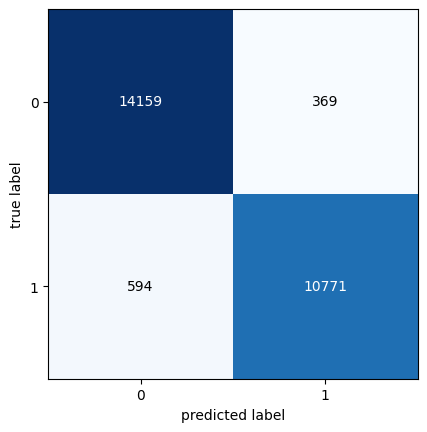

In [ ]:
plot_confusion_matrix(conf_mat=matriz_confusao)

In [ ]:
import joblib

In [ ]:
joblib.dump(stacking_cv_classifier, 'modelo_treinado.pkl')

['modelo_treinado.pkl']

In [ ]:
modelo_carregado = joblib.load('modelo_treinado.pkl')

In [ ]:
X_teste.iloc[2]

Age                                   20.0
Flight Distance                      192.0
Inflight wifi service                  2.0
Departure/Arrival time convenient      0.0
Ease of Online booking                 2.0
Gate location                          4.0
Food and drink                         2.0
Online boarding                        2.0
Seat comfort                           2.0
Inflight entertainment                 2.0
On-board service                       4.0
Leg room service                       1.0
Baggage handling                       3.0
Checkin service                        2.0
Inflight service                       2.0
Cleanliness                            2.0
Departure Delay in Minutes             0.0
Arrival Delay in Minutes               0.0
Gender_Female                          0.0
Gender_Male                            1.0
Customer Type_Loyal Customer           0.0
Customer Type_disloyal Customer        1.0
Type of Travel_Business travel         1.0
Type of Tra

In [ ]:
previsao = modelo_carregado.predict([X_teste.iloc[2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
previsao

array([0])